<a href="https://colab.research.google.com/github/GioGio2004/pytorch/blob/main/simple_neural_networl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Model(nn.Module):
  def __init__(self, in_features=4, hiddenlayer_1=8, hiddenlayer_2=9, out_features=3):
    super().__init__()
    self.hidden_layer1 = nn.Linear(in_features, hiddenlayer_1)
    self.hidden_layer2 = nn.Linear(hiddenlayer_1, hiddenlayer_2)
    self.output_layer = nn.Linear(hiddenlayer_2, out_features)

  def forward(self, x):
    x = F.relu(self.hidden_layer1(x))
    x = F.relu(self.hidden_layer2(x))
    x = self.output_layer(x)

    return x


In [3]:
torch.manual_seed(41)
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [6]:
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)

In [7]:
X = my_df.drop('species', axis=1)
y = my_df['species']
X = X.values
y = y.values

In [8]:
from sklearn.model_selection import train_test_split


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [15]:
epoches = 100
error = []
for i in range(epoches):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  error.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f"epoch {i} loss: {loss}")

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch 0 loss: 0.00903741829097271
epoch 10 loss: 0.008615588769316673
epoch 20 loss: 0.008653796277940273
epoch 30 loss: 0.007937375456094742
epoch 40 loss: 0.007401105482131243
epoch 50 loss: 0.007080807350575924
epoch 60 loss: 0.006726674735546112
epoch 70 loss: 0.006521536968648434
epoch 80 loss: 0.006200295872986317
epoch 90 loss: 0.00588409136980772


Text(0.5, 0, 'epoch')

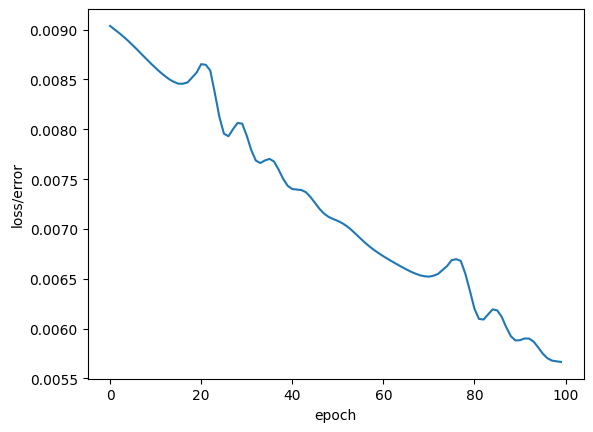

In [16]:
plt.plot(range(epoches), error)
plt.ylabel("loss/error")
plt.xlabel("epoch")